In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/powerlifting-dataset/openipf-2023-10-28/README.txt
/kaggle/input/powerlifting-dataset/openipf-2023-10-28/LICENSE.txt
/kaggle/input/powerlifting-dataset/openipf-2023-10-28/openipf-2023-10-28-91d2cada.csv


In [2]:
df = pd.read_csv('/kaggle/input/powerlifting-dataset/openipf-2023-10-28/openipf-2023-10-28-91d2cada.csv', index_col='Division')

/tmp/ipykernel_20/1495000333.py:1: DtypeWarning: Columns (33,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/powerlifting-dataset/openipf-2023-10-28/openipf-2023-10-28-91d2cada.csv', index_col='Division')


In [3]:
df.shape

(1204728, 40)

In [4]:
pd.set_option('display.max_columns', 40) #all of our columns
pd.set_option('display.max_rows', 5)

In [5]:
df.head(10)

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
Division,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Masters 1,Karen Thomson,F,SBD,Single-ply,39.5,35-39,40-49,51.90,52,105.0,110.5,-115.0,NaN,110.5,67.5,70.5,72.5,NaN,72.5,125.0,130.0,-136.0,NaN,130.0,312.5,1,381.42,390.15,345.86,63.73,Yes,New Zealand,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
Open,Deborah Groves,F,SBD,Single-ply,30.5,24-34,24-39,50.64,52,122.5,-127.5,127.5,NaN,127.5,82.5,87.5,90.0,NaN,90.0,140.0,152.5,-157.0,NaN,152.5,370.0,1,459.45,470.74,417.74,76.76,Yes,Australia,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Masters 1,Dean Rask,M,SBD,Single-ply,NaN,NaN,40-49,67.02,67.5,150.0,170.0,180.0,NaN,180.0,90.0,97.5,-102.5,NaN,97.5,170.0,190.0,-200.0,NaN,190.0,467.5,1,362.19,362.52,352.01,61.94,Yes,New Zealand,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships
Masters 3,Tony Feltham,M,SBD,Single-ply,NaN,NaN,60-69,64.90,67.5,65.0,75.0,-85.0,NaN,75.0,77.5,82.5,87.5,NaN,87.5,85.0,100.0,112.5,NaN,112.5,275.0,1,218.20,218.96,212.94,37.28,Yes,Australia,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships


In [6]:
df.rename(columns={'WeightClassKg': 'WeightClass'}, inplace=True)

In [7]:
df['Name'].str.split(' ', expand=True)
df[['First', 'Last', 'Third', 'Fourth', 'Fifth', 'Seventh', 'Ninth']] = df['Name'].str.split(' ', expand=True)
df.drop(columns=['Fourth', 'Fifth', 'Seventh', 'Ninth'], inplace=True)
df

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,BodyweightKg,WeightClass,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,...,Best3DeadliftKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,First,Last,Third
Division,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Masters 1,Karen Thomson,F,SBD,Single-ply,39.5,35-39,40-49,51.90,52,105.0,110.5,-115.0,NaN,110.5,67.5,70.5,72.5,NaN,72.5,125.0,...,130.0,312.5,1,381.42,390.15,345.86,63.73,Yes,New Zealand,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships,Karen,Thomson,None
Open,Deborah Groves,F,SBD,Single-ply,30.5,24-34,24-39,50.64,52,122.5,-127.5,127.5,NaN,127.5,82.5,87.5,90.0,NaN,90.0,140.0,...,152.5,370.0,1,459.45,470.74,417.74,76.76,Yes,Australia,NaN,OceaniaPF,IPF,2002-12-06,New Zealand,BOP,Tauranga,Oceania Championships,Deborah,Groves,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Open,Kelly Phasey,F,SBD,Single-ply,39.5,35-39,40-49,124.53,84+,210.0,220.0,-227.5,NaN,220.0,140.0,-147.5,150.0,NaN,150.0,145.0,...,145.0,515.0,6,409.13,409.13,345.98,72.24,Yes,England,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships,Kelly,Phasey,None
Open,Hildeborg Juvet Hugdal,F,SBD,Single-ply,32.5,24-34,24-39,123.00,84+,-247.5,-250.0,-250.0,NaN,NaN,220.0,230.0,-237.5,NaN,230.0,170.0,...,170.0,NaN,DQ,NaN,NaN,NaN,NaN,Yes,Norway,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships,Hildeborg,Juvet,Hugdal


**Creation of a group that contains only records for players from Poland**

In [8]:
country_grp = df.groupby(['Country'])
poland_country_lifters = country_grp.get_group('Poland')
poland_country_lifters

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,BodyweightKg,WeightClass,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,...,Best3DeadliftKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,First,Last,Third
Division,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
M-C-Open,Jacek Stanek,M,SBD,Raw,33.5,24-34,24-39,146.80,120+,320.0,340.0,-345.0,NaN,340.0,190.0,200.0,205.0,NaN,205.0,305.0,...,322.5,867.5,2,469.23,481.45,455.95,92.83,Yes,Poland,NaN,BP,IPF,2014-11-29,UK,NaN,Glasgow,Four Nations,Jacek,Stanek,None
M-C-Open,Jacek Stanek,M,SBD,Raw,32.5,24-34,24-39,141.70,120+,260.0,280.0,300.0,NaN,300.0,180.0,-190.0,-190.0,NaN,180.0,260.0,...,300.0,780.0,1,426.02,435.09,413.18,84.62,Yes,Poland,NaN,NIPF,IPF,2013-11-23,N.Ireland,NaN,NaN,Raw Power,Jacek,Stanek,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Open,Jan Wegiera,M,SBD,Single-ply,50.5,50-54,50-59,92.67,93,330.0,340.0,350.0,NaN,350.0,285.0,295.0,305.0,NaN,305.0,270.0,...,280.0,935.0,5,595.92,588.35,563.19,101.59,Yes,Poland,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships,Jan,Wegiera,None
Open,Olimpia Felińska,F,SBD,Single-ply,24.0,24-34,24-39,50.71,52,167.5,175.0,-180.0,NaN,175.0,85.0,90.0,-92.5,NaN,90.0,147.5,...,147.5,412.5,9,511.72,524.26,465.20,85.49,Yes,Poland,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships,Olimpia,Felińska,None


# Analysis without gender separation

**Creation of medians for three disciplines: squat, bench press, deadlift**

In [9]:
sq_median = poland_country_lifters['Best3SquatKg'].median()
bench_median = poland_country_lifters['Best3BenchKg'].median()
dl_median = poland_country_lifters['Best3DeadliftKg'].median()
total_pwrlf_results_median = sq_median + bench_median + dl_median

Text(0.5, 1.0, 'Percentage distribution of individual disciplines for contribution to median total score. Which is: 532.5kg')

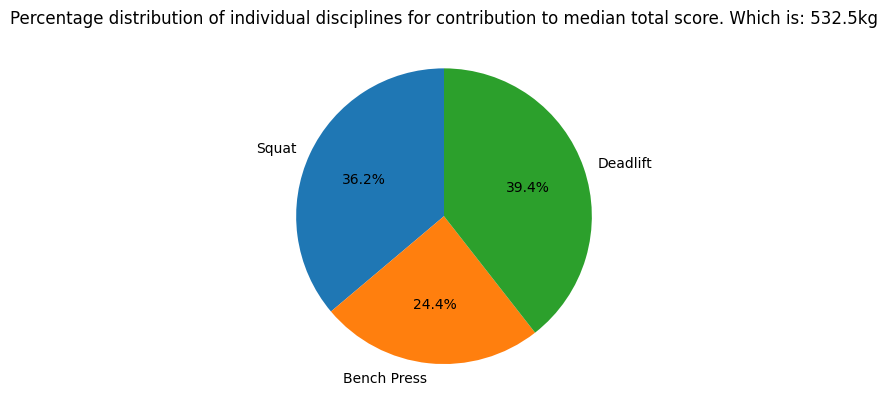

In [10]:
plt.pie([sq_median, bench_median, dl_median], labels=['Squat', 'Bench Press', 'Deadlift'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage distribution of individual disciplines for contribution to median total score. Which is: 532.5kg')

**As we can see, the deadlift contributed the most to the total score, but only 3.2% more than the squat. On the other hand, the most outlier was the extrusion because as much as 15% from the deadlift and 11.8% from the squat.**

# Analysis for Male Lifters

**Creating a group for male athletes from Poland**

In [11]:
country_grp = df.groupby(['Country', 'Sex'])
poland_country_lifters_male = country_grp.get_group(('Poland','M'))
poland_country_lifters_male

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,BodyweightKg,WeightClass,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,...,Best3DeadliftKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,First,Last,Third
Division,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
M-C-Open,Jacek Stanek,M,SBD,Raw,33.5,24-34,24-39,146.80,120+,320.0,340.0,-345.0,NaN,340.0,190.0,200.0,205.0,NaN,205.0,305.0,...,322.5,867.5,2,469.23,481.45,455.95,92.83,Yes,Poland,NaN,BP,IPF,2014-11-29,UK,NaN,Glasgow,Four Nations,Jacek,Stanek,None
M-C-Open,Jacek Stanek,M,SBD,Raw,32.5,24-34,24-39,141.70,120+,260.0,280.0,300.0,NaN,300.0,180.0,-190.0,-190.0,NaN,180.0,260.0,...,300.0,780.0,1,426.02,435.09,413.18,84.62,Yes,Poland,NaN,NIPF,IPF,2013-11-23,N.Ireland,NaN,NaN,Raw Power,Jacek,Stanek,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Open,Tomasz Miloch,M,SBD,Single-ply,32.5,24-34,24-39,77.09,83,-240.0,-240.0,-240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,DQ,NaN,NaN,NaN,NaN,Yes,Poland,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships,Tomasz,Miloch,None
Open,Jan Wegiera,M,SBD,Single-ply,50.5,50-54,50-59,92.67,93,330.0,340.0,350.0,NaN,350.0,285.0,295.0,305.0,NaN,305.0,270.0,...,280.0,935.0,5,595.92,588.35,563.19,101.59,Yes,Poland,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships,Jan,Wegiera,None


**Creation of medians for three disciplines: squat, bench press, deadlift**

In [12]:
sq_median_m = poland_country_lifters_male['Best3SquatKg'].median()
bench_median_m = poland_country_lifters_male['Best3BenchKg'].median()
dl_median_m = poland_country_lifters_male['Best3DeadliftKg'].median()
total_pwrlf_results_median_male = sq_median_m + bench_median_m + dl_median_m

Text(0.5, 1.0, 'Percentage distribution of individual disciplines for contribution to median total score for MALE Lifters. Which is: 605.5kg')

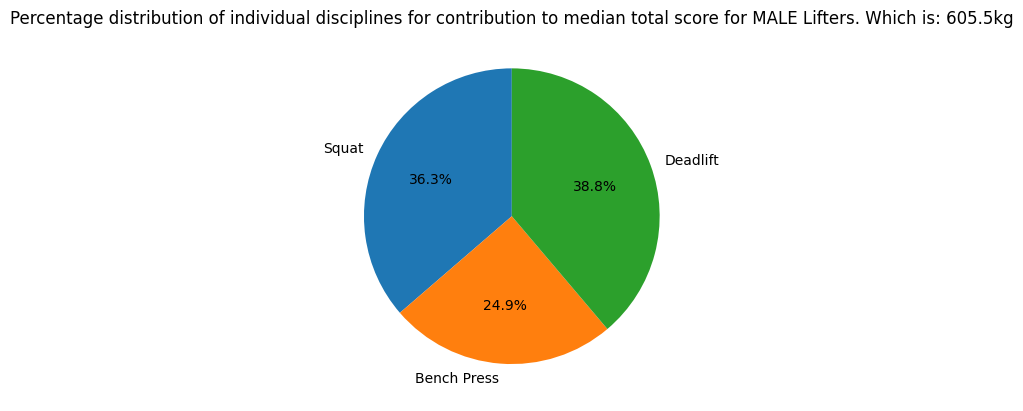

In [13]:
plt.pie([sq_median_m, bench_median_m, dl_median_m], labels=['Squat', 'Bench Press', 'Deadlift'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage distribution of individual disciplines for contribution to median total score for MALE Lifters. Which is: 605.5kg')

**As we can see, the Deadlift contributed the most to the total score, but only 2.5% more than the Squat. On the other hand, the most outlier was the Bench Press because as much as 13.9% from the deadlift and 11.4% from the Squat.**

# Analysis for Female Lifters

**Creating a group for male athletes from Poland**


In [14]:
country_grp = df.groupby(['Country', 'Sex'])
poland_country_lifters_female = country_grp.get_group(('Poland','F'))
poland_country_lifters_female

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,BodyweightKg,WeightClass,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,...,Best3DeadliftKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,First,Last,Third
Division,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
guest,Agata Wrobel,F,B,Raw,NaN,NaN,NaN,116.00,90+,NaN,NaN,NaN,NaN,NaN,75.0,-80.0,NaN,NaN,75.0,NaN,...,NaN,75.0,2,60.78,60.34,51.23,53.36,Yes,Poland,NaN,BAWLA,IPF,2007-07-28,UK,NaN,Colchester,British Unequipped Bench Press Championships,Agata,Wrobel,None
Open,Agata Wrobel,F,B,Raw,NaN,NaN,NaN,117.00,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,NaN,...,NaN,75.0,1,60.62,60.25,51.13,53.33,Yes,Poland,NaN,BAWLA,IPF,2007-07-01,England,NaN,Ashford,SE Counties Bench Press Championships,Agata,Wrobel,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Juniors,Karolina Kołata,F,SBD,Single-ply,23.0,20-23,19-23,102.35,84+,100.0,-205.0,-205.0,NaN,100.0,-160.0,160.0,-165.0,NaN,160.0,150.0,...,160.0,420.0,3,355.23,347.41,297.56,61.76,Yes,Poland,NaN,IPF,IPF,2022-08-27,Turkey,NaN,Istanbul,World Junior Equipped Powerlifting Championships,Karolina,Kołata,None
Open,Olimpia Felińska,F,SBD,Single-ply,24.0,24-34,24-39,50.71,52,167.5,175.0,-180.0,NaN,175.0,85.0,90.0,-92.5,NaN,90.0,147.5,...,147.5,412.5,9,511.72,524.26,465.20,85.49,Yes,Poland,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships,Olimpia,Felińska,None


In [15]:
sq_median_f = poland_country_lifters_female['Best3SquatKg'].median()
bench_median_f = poland_country_lifters_female['Best3BenchKg'].median()
dl_median_f = poland_country_lifters_female['Best3DeadliftKg'].median()
total_pwrlf_results_median_female = sq_median_f + bench_median_f + dl_median_f

Text(0.5, 1.0, 'Percentage distribution of individual disciplines for contribution to median total score for FEMALE Lifters. Which is: 324kg')

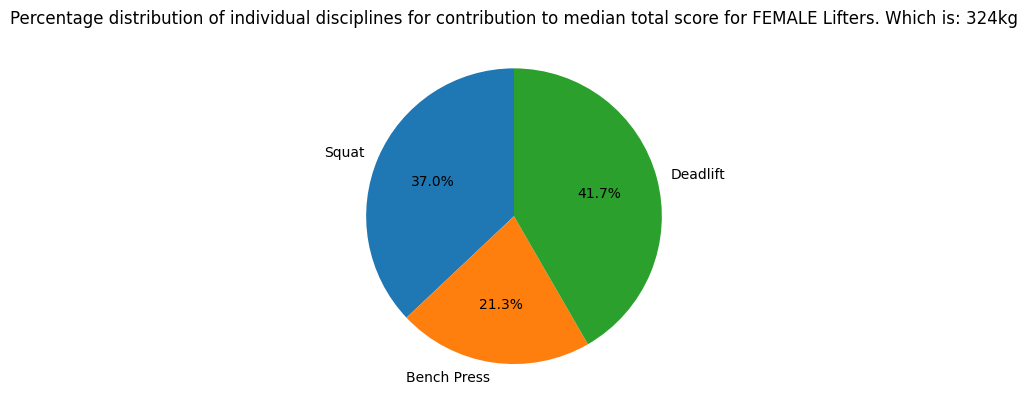

In [16]:
plt.pie([sq_median_f, bench_median_f, dl_median_f], labels=['Squat', 'Bench Press', 'Deadlift'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage distribution of individual disciplines for contribution to median total score for FEMALE Lifters. Which is: 324kg')

**As we can see, the Deadlift contributed the most to the total score, but much more than this difference in MALE category, because as much as 4.7% more than the Squat. On the other hand, the most outlier was the Bench Press because as much as 20.4% from the deadlift and 16.3% from the Squat. We can notice that in women, the Bench Press is significantly far less share of the total from the other two exercises.**

# Final Thoughts

**In the analysis of male and female powerlifting performance, we observe interesting differences in the contributions of the three main exercises: Squat, Bench Press, and Deadlift.**

**For males, the Deadlift has the highest contribution to the total score, edging out the Squat by a modest 2.5%. However, the Bench Press lags significantly behind, comprising only 85.1% of the Deadlift's score and 88.6% of the Squat's score. This indicates that the Bench Press is an outlier in the male category, with a substantial difference from the other two exercises.**

**On the other hand, in the female category, the Deadlift remains the highest contributor to the total score, surpassing the Squat by a more substantial 4.7%. Similar to the male category, the Bench Press stands out as an outlier, representing only 79.6% of the Deadlift's score and 83.7% of the Squat's score. Here, the Bench Press has an even more pronounced difference from the other two exercises, indicating a significant gap in performance.**

**These findings suggest that the Bench Press exercise has a considerably lower share of the total score in women compared to men, highlighting a potential area for further analysis and improvement.**